In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# We make a matrix that, in the end, will contain the mean charges for every atom type, for every mutant
atoms = np.zeros((5, 5))

In [3]:
mutants = []

# First we need to find out the indexes for all hydrogens, oxygens, carbons, so on ...
# So ...
# For all mutants ...
for k, mutant in enumerate(['ubiWT', 'ubi6', 'ubi20', 'ubi35', 'ubi48']):
    mutants.append([])
    H = []
    C = []
    O = []
    N = []
    S = []

    # load the pdb file ...
    file_name = f"/home/simon/structure_files/pdbs/{mutant}.pdb"

    # open the file ...
    with open(file_name, 'r') as file:
            
            # then go through every line to find which index every atoms is in
            lines = file.readlines()
            for line in lines:
                sign = line[77:78]
                if sign == 'H':
                    H.append(line[7:11].strip())

                if sign == 'C':
                    C.append(line[7:11].strip())

                if sign == 'O':
                    O.append(line[7:11].strip())

                if sign == 'N':
                    N.append(line[7:11].strip())

                if sign == 'S':
                    S.append(line[7:11].strip())
    
    mutants[k].append(H)
    mutants[k].append(C)
    mutants[k].append(O)
    mutants[k].append(N)
    mutants[k].append(S)

In [4]:
total = []

# Now that we have the indexes, for every energy ...
for k, energy in enumerate(['300ev', '600ev', '2000ev']):
    total.append([])

    # and every mutant ...
    for n, mutant in enumerate(['ubiWT', 'ubi6', 'ubi20', 'ubi35', 'ubi48']):
        length = len(mutants[n][0]) + len(mutants[n][1]) + len(mutants[n][2]) + len(mutants[n][3]) + len(mutants[n][4])
        H = 0
        C = 0
        O = 0
        N = 0
        S = 0

        # and every simulation ...
        for simn in range(100):
            file_name = f"/home/simon/results/last_frame/{energy}/{mutant}_static/sim{simn+1}/simulation_output/charges.txt"

            # open the charges file ...
            with open(file_name, 'r') as file:
                    lines = file.readlines()

                    # Go through all the lines ...
                    for line in lines:

                        # Split each line (we only want the charges)
                        words = line.split()
                        index = words[0]
                        charge = int(words[1])

                        # Add the charge as a contribution from that atom type
                        # Note that the reason we divide by 100 is because we will look at the mean across all 100 simulations, and the reason we divide by length is because we will also take the mean across all mutants
                        if index in mutants[n][0]:
                            H += charge / (100 * length)
                        if index in mutants[n][1]:
                            C += charge / (100 * length)
                        if index in mutants[n][2]:
                            O += charge / (100 * length)
                        if index in mutants[n][3]:
                            N += charge / (100 * length)
                        if index in mutants[n][4]:
                            S += charge / (100 * length)
        
    total[k].append(H)
    total[k].append(C)
    total[k].append(O)
    total[k].append(N)
    total[k].append(S)

In [5]:
# Now we define the bar groups
barwidth = 0.25
group_300= np.arange(len(total[0]))
group_600 = [x + barwidth for x in group_300]
group_2000 = [x + barwidth for x in group_600]

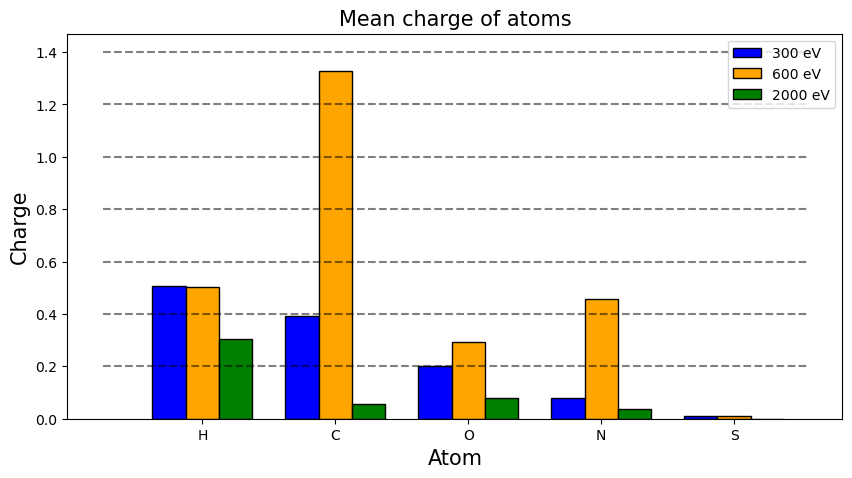

In [6]:
# And then we plot the bars
fig = plt.subplots(figsize=(10,5))
plt.bar(group_300, total[0], color='blue', width=barwidth, edgecolor='black', label='300 eV')
plt.bar(group_600, total[1], color='orange', width=barwidth, edgecolor='black', label='600 eV')
plt.bar(group_2000, total[2], color='green', width=barwidth, edgecolor='black', label='2000 eV')
plt.hlines(y=[0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4], xmin=-0.5, xmax=4.8, color='black', linestyles='dashed', alpha=0.5)
plt.xlabel('Atom', fontsize=15)
plt.ylabel('Charge', fontsize=15)
plt.title('Mean charge of atoms', fontsize=15)
plt.legend()
plt.xticks([r + barwidth for r in range(len(total[0]))], ['H', 'C', 'O', 'N', 'S'])
plt.show()